## 1. Understand Tensors in PyTorch:
### ● Task: Create a tensor in PyTorch and perform basic operations on it (addition, multiplication, transposition).
### ● Objective: Understand the basic concepts of tensors, which are key elements in machine learning and deep learning.

In [ ]:
import torch

In [ ]:
tensor1 = torch.FloatTensor([[1,2,3,4],[4,3,2,1],[4,2,1,3]])
tensor1

tensor([[1., 2., 3., 4.],
        [4., 3., 2., 1.],
        [4., 2., 1., 3.]])

In [ ]:
add = tensor1 + 2
add

tensor([[3., 4., 5., 6.],
        [6., 5., 4., 3.],
        [6., 4., 3., 5.]])

In [ ]:
multi = tensor1 * 2
multi

tensor([[2., 4., 6., 8.],
        [8., 6., 4., 2.],
        [8., 4., 2., 6.]])

In [ ]:
transposed = torch.transpose(tensor1, 0, 1)
transposed

tensor([[1., 4., 4.],
        [2., 3., 2.],
        [3., 2., 1.],
        [4., 1., 3.]])

In [ ]:
tensor2 = torch.randint(1, 10, (2,2))
tensor3 = torch.randint(1, 10, (2,2))

print(tensor2)
print(tensor3)

tensor([[8, 4],
        [3, 3]])
tensor([[6, 3],
        [6, 1]])


In [ ]:
torch.matmul(tensor2, tensor3)

tensor([[72, 28],
        [36, 12]])

In [ ]:
torch.add(tensor2, tensor3)

tensor([[14,  7],
        [ 9,  4]])

In [ ]:
torch.mul(tensor2, tensor3)

tensor([[48, 12],
        [18,  3]])

## 2. Data Loading and Processing:
### ● Task: Load a dataset (e.g. MNIST) using PyTorch DataLoader and perform simple transformations on it (normalisation, resizing, etc.).
### ● Objective: Understand how to process the data before training the model.

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(), # transform to tensors 
    transforms.Resize((32, 32), antialias=True),
    transforms.Normalize((0.5,), (0.5,))]) 

In [ ]:
# data loading
data_train = DataLoader( 
    MNIST
    ('./mnist_data',
    train = True,
    download = True,
    transform = transform),
    batch_size = 64, 
    shuffle = True)

In [ ]:
# check if the size has changed
for images, labels in data_train:
    print("Batch size:", images.size())
    break

Batch size: torch.Size([64, 1, 32, 32])


## 3. Building a Simple Neural Network Model:
### ● Task: Build a simple neural network model (e.g. one hidden layer) in PyTorch for image classification.
### ● Objective: Understand the basic concepts of building and training neural networks.

In [ ]:
import matplotlib.pyplot as plt
from torch import nn

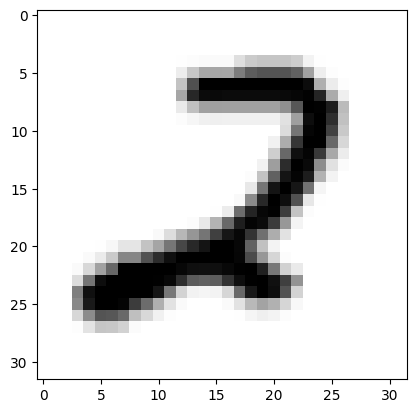

In [ ]:
# still working on the MNIST collection
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r') # print one image

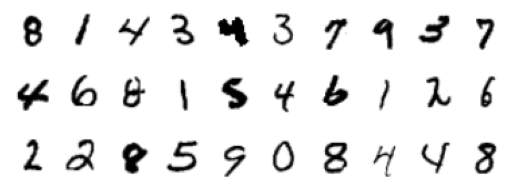

In [ ]:
figure = plt.figure()
num_of_images = 30
for index in range(1, num_of_images + 1): # print more images
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
input_size = 1024 # 32 x 32 (image size)
hidden_size = 128 
output_size = 10 

model = nn.Sequential(nn.Linear(input_size, hidden_size),
                  nn.ReLU(),
                  nn.Linear(hidden_size, output_size),
                  nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=1024, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: 0.weight | Size: torch.Size([128, 1024]) | Values : tensor([[ 0.0093,  0.0008, -0.0157,  ..., -0.0020,  0.0284,  0.0108],
        [-0.0004, -0.0215,  0.0063,  ...,  0.0084, -0.0288,  0.0104]],
       grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([128]) | Values : tensor([0.0057, 0.0067], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([10, 128]) | Values : tensor([[-0.0764,  0.0124, -0.0832, -0.0789,  0.0792, -0.0851,  0.0379,  0.0676,
         -0.0634,  0.0489,  0.0468,  0.0054,  0.0234, -0.0138,  0.0012,  0.0144,
         -0.0131,  0.0418, -0.0763, -0.0023,  0.0318,  0.0539,  0.0018, -0.0182,
         -0.0799,  0.0121,  0.0372, -0.0516,  0.0019,  0.0788, -0.0783,  0.0647,
         -0.0690,  0.0629, -0.0315, -0.0619,  0.0418, -0.0420,  0.0639,  0.0876,
          0.0012,  0.0676,  0.0286, -0.0543, -0.0416,  0.0635, -0.0233,  0.0194,
         -0.0416, -0.0422, -0.0239, -0.0221, -0.0633, -0.0137,  0.0455, -0.0570,
         -0.0658,  0.0262, -0.0560, -

## Corrected Task 3

In [ ]:
import torch.nn.functional as F

In [ ]:
class SimpleModel(nn.Module):
    def __init__(self, hidden_size, input_size, output_size):
        super(SimpleModel, self).__init__()
        self.flatten = nn.Flatten() # flatten the image
        self.layer = nn.Linear(input_size, hidden_size) # linear layer
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.layer(x)
        x = self.activation(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

model = SimpleModel(hidden_size, input_size, output_size)
model

SimpleModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer): Linear(in_features=1024, out_features=128, bias=True)
  (activation): ReLU()
  (output): Linear(in_features=128, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [ ]:
# class SimpleNetwork(nn.Module):
#     def __init__(self, hidden_size, input_size, output_size):
#         super(SimpleNetwork, self).__init__()
#         self.flatten = nn.Flatten()
#         self.conv1 = nn.Conv2d(input_size, hidden_size, kernel_size=3, padding=1)
#         self.activation = nn.ReLU()
#         self.output = nn.Linear(hidden_size * output_size * output_size, output_size)

#     def forward(self, x):
#         x = self.flatten(x)
#         x = F.relu(self.conv1(x))
#         x = self.activation(x)
#         x = self.output(x)
#         x = F.log_softmax(x, dim=1)
#         return x

# model = SimpleModel(hidden_size, input_size, output_size)
# print(model)

In [ ]:
model.state_dict()

OrderedDict([('layer.weight',
              tensor([[ 0.0272, -0.0167, -0.0215,  ..., -0.0150,  0.0054, -0.0205],
                      [ 0.0311,  0.0002, -0.0259,  ..., -0.0144, -0.0027,  0.0035],
                      [ 0.0110, -0.0046,  0.0114,  ...,  0.0288, -0.0312, -0.0208],
                      ...,
                      [-0.0302,  0.0195, -0.0226,  ..., -0.0098,  0.0081, -0.0075],
                      [-0.0034, -0.0221,  0.0229,  ..., -0.0299, -0.0192,  0.0084],
                      [-0.0223, -0.0087,  0.0243,  ...,  0.0014, -0.0295, -0.0279]])),
             ('layer.bias',
              tensor([-6.1560e-03,  6.5384e-03,  2.6768e-02,  2.0221e-02,  1.6741e-02,
                      -1.7138e-02,  2.1017e-02,  2.6694e-02,  2.3898e-02, -2.0396e-02,
                       2.0497e-02, -2.9486e-02,  7.8318e-04, -1.6359e-02, -3.4082e-03,
                       9.5681e-03,  1.0209e-03, -3.7324e-03,  1.5824e-02,  4.8869e-03,
                       4.8205e-03, -3.8053e-03,  5.5201e-03,

## 4. Loss Functions and Optimisers:
### ● Task: Use various loss functions and optimisers to train a simple model in PyTorch.
### ● Objective: To learn about the role of loss functions and optimisers in machine learning.

In [ ]:
from torch import optim

In [ ]:
# split the data into training and test data
train_dataset = DataLoader( 
    MNIST
    ('./mnist_data',
    train = True,
    download = True,
    transform = transform),
    batch_size = 64, 
    shuffle = True)

test_dataset =  DataLoader( 
    MNIST
    ('./mnist_data',
    train = False,
    download = True,
    transform = transform),
    batch_size = 64, 
    shuffle = False)

print('Training set has {} instances'.format(len(train_dataset)))
print('Testing set has {} instances'.format(len(test_dataset)))

Training set has 938 instances
Testing set has 157 instances


In [ ]:
loss_func1 = F.cross_entropy
loss_func2 = nn.NLLLoss()
opt1 = optim.SGD(model.parameters(), lr = 1e-3)
opt2 = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
def trainer(model, loss_func, opt, train_dataset, epochs=10, verbose=True):
    '''
    Training function for epochs = 10, returning accuracy and loss function values.
    '''
    model.train()
    train_accuracies = []
    train_losses = []

    for epoch in range(epochs):
        epoch_loss = 0.0
        correct_pred = 0
        total_samples = 0

        for x, y in train_dataset:
            # prediction and loss function
            pred = model(x)
            loss = loss_func(pred, y)

            # backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # accuracy
            _, predicted = torch.max(pred.data, 1)
            total_samples += y.size(0)
            correct_pred += (predicted == y).sum().item()

            # loss
            epoch_loss += loss.item()

        # calculation of accuracy and loss function for each epoch
        average_loss = epoch_loss / len(train_dataset)
        accuracy = correct_pred / total_samples

        # adding results to lists
        train_losses.append(average_loss)
        train_accuracies.append(accuracy)

        if verbose:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {average_loss}, Accuracy: {accuracy}')

    return train_losses, train_accuracies

In [ ]:
# train1 = trainer(model, loss_func1, opt1, data_train)
# train1 

In [ ]:
train_losses, train_accuracies = trainer(model, loss_func2, opt2, data_train)

Epoch [1/10], Loss: 0.38508999742456335, Accuracy: 0.88755
Epoch [2/10], Loss: 0.20373409884824936, Accuracy: 0.93905
Epoch [3/10], Loss: 0.15132636371165958, Accuracy: 0.9544166666666667
Epoch [4/10], Loss: 0.12400832486404444, Accuracy: 0.9627833333333333
Epoch [5/10], Loss: 0.10795044996289176, Accuracy: 0.9669
Epoch [6/10], Loss: 0.09639782547803798, Accuracy: 0.9702166666666666
Epoch [7/10], Loss: 0.08816967042399321, Accuracy: 0.9724666666666667
Epoch [8/10], Loss: 0.08121871661659437, Accuracy: 0.9745166666666667
Epoch [9/10], Loss: 0.07594962927725302, Accuracy: 0.9758666666666667
Epoch [10/10], Loss: 0.07189168230340535, Accuracy: 0.9772


In [ ]:
def tester(model, test_dataset, loss_func):
    '''
    Function used to validate the model on the test set.
    '''
    model.eval()
    test_loss = 0
    correct_pred = 0
    total_samples = 0 

    with torch.no_grad():
        for x, y in test_dataset:
            pred = model(x)
            test_loss += loss_func(pred, y).item()
            correct_pred += torch.eq(pred.argmax(1), y).sum().item()
            total_samples += y.size(0)

    test_loss /= len(test_dataset)
    accuracy = correct_pred / total_samples

    print(f"Test Error: \n Accuracy: {accuracy * 100:.2f}%, Avg loss: {test_loss:.8f} \n")


In [ ]:
test = tester(model, test_dataset, loss_func2)

Test Error: 
 Accuracy: 97.28%, Avg loss: 0.09116000 



## 5. Visualising the Model Results:
### ● Task: After training the model, generate graphs showing accuracy (accuracy) and loss (loss) over time.
### ● Objective: To understand how to monitor and analyse progress in machine learning.

In [ ]:
import matplotlib.pyplot as plt

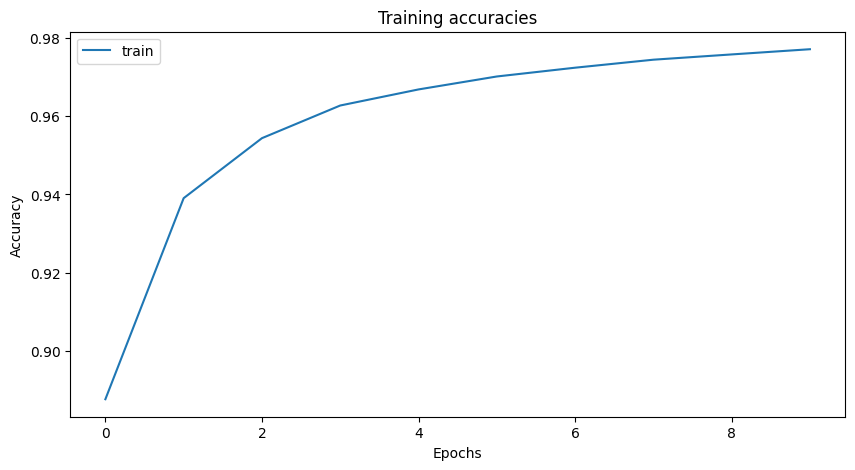

In [ ]:
# accuracy
plt.figure(figsize=(10,5))
plt.title("Training accuracies")
plt.plot(train_accuracies, label="train")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

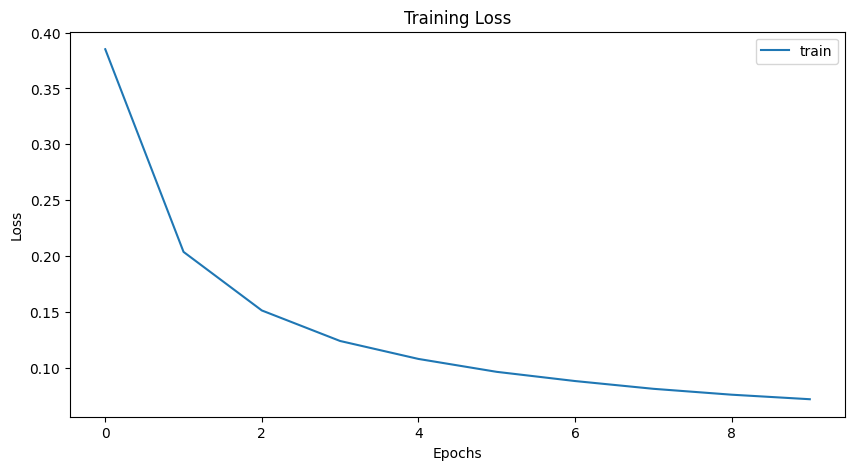

In [ ]:
# loss function 
plt.figure(figsize=(10,5))
plt.title("Training Loss")
plt.plot(train_losses, label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 6. Save and Load Model:
### ● Task: Save the trained model to a file and reload it.
### ● Objective: To learn how to manage models, which is key in the practical application of machine learning.

In [ ]:
torch.save(model.state_dict(), './simple_model.pt') # saving the model

In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in opt2.state_dict():
    print(var_name, "\t", opt2.state_dict()[var_name])

Model's state_dict:
layer.weight 	 torch.Size([128, 1024])
layer.bias 	 torch.Size([128])
output.weight 	 torch.Size([10, 128])
output.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {0: {'step': tensor(9380.), 'exp_avg': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        [-4.2254e-04, -4.2254e-04, -4.2254e-04,  ..., -4.2254e-04,
         -4.2254e-04, -4.2254e-04],
        [ 1.0669e-03,  1.0669e-03,  1.0669e-03,  ...,  1.0669e-03,
          1.0669e-03,  1.0669e-03],
        ...,
        [ 9.8869e-04,  9.8869e-04,  9.8869e-04,  ...,  9.8869e-04,
          9.8869e-04,  9.8869e-04],
        [-1.7548e-08, -1.7548e-08, -1.7548e-08,  ..., -1.7548e-08,
         -1.7548e-08, -1.7548e-08],
        [ 5.6110e-04,  5.6110e-04,  5.6110e-04,  ...,  5.6110e-04,
          5.6110e-04,  5.6110e-04]]), 'exp_avg_sq': tensor([[3.3773e-15, 3.3773e-15, 3.3773e-15,  ..., 3.3773e-15, 3.3773e-15,
         3.3773e-15],
        [6.5768e-06, 6.576

In [ ]:
# loading the model
model = SimpleModel(hidden_size, input_size, output_size)
model.load_state_dict(torch.load('./simple_model.pt'))
model.eval()

SimpleModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer): Linear(in_features=1024, out_features=128, bias=True)
  (activation): ReLU()
  (output): Linear(in_features=128, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
)